In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.getcwd()
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [232]:

data=pd.read_csv('/kaggle/input/titanic/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
data=data.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)

In [107]:
data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,NaN,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [109]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

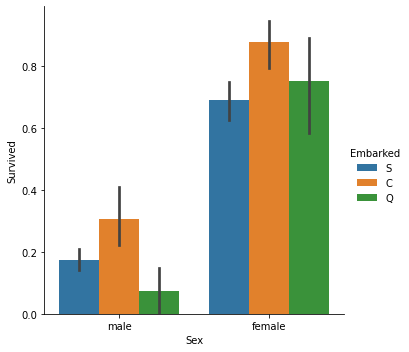

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.catplot(x="Sex",y="Survived",data=data,hue="Embarked",kind="bar")

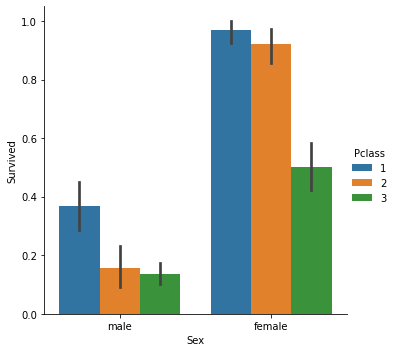

In [254]:
sns.catplot(x="Sex",y="Survived",data=data,hue="Pclass",kind="bar")

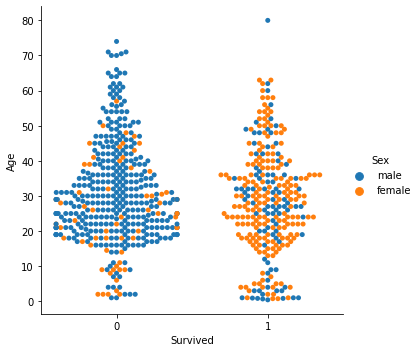

In [256]:
sns.catplot(x="Survived",y='Age',data=data,hue="Sex",kind="swarm")

In [111]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [112]:
data.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [113]:

 data['Embarked']=data['Embarked'].fillna('C')   
    

In [114]:

f=data['Age'].mean()-data['Age'].std()
l=data['Age'].mean()+data['Age'].std()

for i in range(0,891):
    var=np.random.randint(f,l)
    data['Age'].iloc[i:i+1]=data.Age.iloc[i:i+1].fillna(var)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [115]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [117]:
data['Age']=data['Age'].astype(int)

In [118]:
 data=data.drop(['SibSp','Parch'],axis=1)

In [119]:
from sklearn import preprocessing
some=preprocessing.LabelEncoder()
data['Sex']=some.fit_transform(data['Sex'])
data['Embarked']=some.fit_transform(data['Embarked'].astype(str))

In [120]:
data.head(10)

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22,2
1,1,1,0,38,0
2,1,3,0,26,2
3,1,1,0,35,2
4,0,3,1,35,2
5,0,3,1,39,1
6,0,1,1,54,2
7,0,3,1,2,2
8,1,3,0,27,2
9,1,2,0,14,0


In [122]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [123]:
y=data.Survived.values
data=data.drop(['Survived',],axis=1)
x=data

In [124]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,train_size=0.8,random_state=3)

In [125]:
x_tr=np.matrix(x_tr)
x_te=np.matrix(x_te)

In [126]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((712, 4), (179, 4), (712,), (179,))

In [127]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [128]:
model = Sequential()

In [129]:
y_tr=keras.utils.to_categorical(y_tr,2)
y_te=keras.utils.to_categorical(y_te,2)

In [130]:
model.add(Dense(units=128,activation='relu',input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=2,activation='softmax'))


In [131]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [165]:
my_model=model.fit(x_tr,y_tr,batch_size=32,epochs=10)

Epoch 1/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8244
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8146
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8062
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8034
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8202
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8258
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8160
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8216
Epoch 9/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8160
Epoch 10/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8315


In [166]:
model.evaluate(x_te,y_te,batch_size=32)

6/6 [==============================] - 0s 1ms/step - loss: 0.9831 - accuracy: 0.8045


[0.9831050038337708, 0.8044692873954773]

In [167]:
my_model.history.keys()

dict_keys(['loss', 'accuracy'])

In [168]:
my_model.history['accuracy']

[0.824438214302063,
 0.8146067261695862,
 0.8061797618865967,
 0.8033707737922668,
 0.8202247023582458,
 0.8258426785469055,
 0.8160112500190735,
 0.8216292262077332,
 0.8160112500190735,
 0.8314606547355652]

(0.3, 0.5)

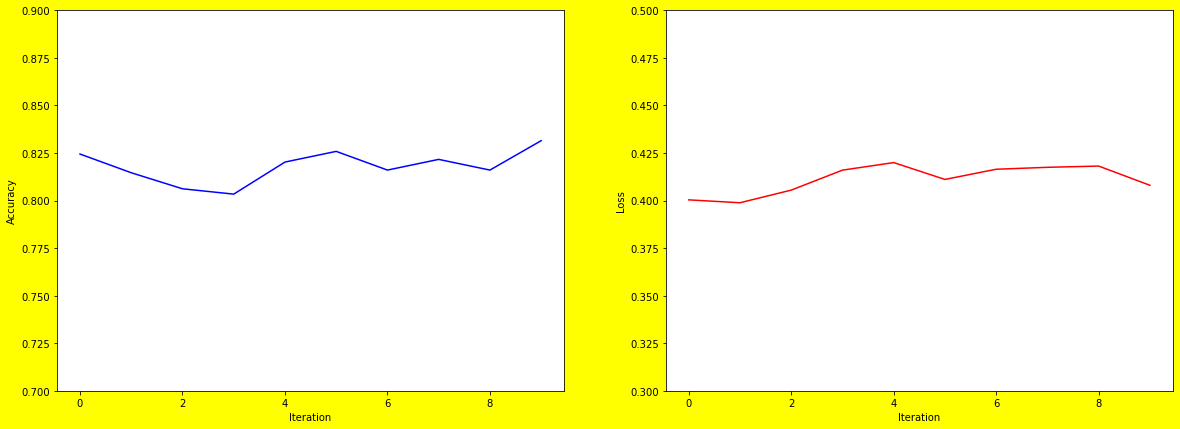

In [230]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7),facecolor="yellow")

ax1.plot(range(10),my_model.history['accuracy'],'b')
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0.7,0.9)
ax2.plot(range(10),my_model.history['loss'],'r')
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Loss")
ax2.set_ylim(0.3,0.5)

In [169]:
data2=pd.read_csv('/kaggle/input/titanic/test.csv')
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [170]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [171]:
data2=data2.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Fare'],axis=1)

In [172]:
data2

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S
...,...,...,...,...
413,3,male,NaN,S
414,1,female,39.0,C
415,3,male,38.5,S
416,3,male,NaN,S


In [173]:
data2.isnull().sum()

Pclass       0
Sex          0
Age         86
Embarked     0
dtype: int64

In [174]:
f=data2['Age'].mean()-data2['Age'].std()
l=data2['Age'].mean()+data2['Age'].std()

for i in range(0,418):
    var=np.random.randint(f,l)
    data2['Age'].iloc[i:i+1]=data2.Age.iloc[i:i+1].fillna(var)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [175]:

data2['Sex']=some.fit_transform(data2['Sex'])
data2['Embarked']=some.fit_transform(data2['Embarked'].astype(str))
data2['Age']=data2['Age'].astype(int)

In [176]:
data2.head()


,Pclass,Sex,Age,Embarked
0,3,1,34,1
1,3,0,47,2
2,2,1,62,1
3,3,1,27,2
4,3,0,22,2


In [178]:
x_test=np.matrix(data2)

In [179]:
x_test.shape

(418, 4)

In [180]:
ans=model.predict(x_test)

In [181]:
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [182]:
lis=list()
Survived=1
Not_Survived=0
for i in range(0,418):
    if ans[i,0]>0.5:
            lis.append(0)
    else:
            lis.append(1)
    
        
sub=pd.DataFrame()
sub['PassengerId']=test_data['PassengerId']
sub.insert(1,'Survived',lis)
sub.head()  

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [183]:
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [186]:
filename="Final_SUBMISSION-3.csv"

In [187]:
sub.to_csv(filename,index=False)

In [188]:
print('Saved file: ' + filename)

Saved file: Final_SUBMISSION-3.csv
